## Ridge Regression:
It tries to minimize the impact of large coefficients by penalizing their square values.
It doesn't force coefficients to be exactly zero.
Useful for dealing with multicollinearity (when predictors are highly correlated).
## Lasso Regression:
It penalizes the absolute values of coefficients.
Can force some coefficients to be exactly zero, effectively removing less important features.
Useful for feature selection and creating more interpretable models.
In essence, Ridge aims to reduce the impact of large coefficients, while Lasso can lead to sparser models by eliminating some coefficients altogether.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [3]:
print(data.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X=data.data
y=data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [6]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [7]:
L.fit(X_train,y_train)


LinearRegression()

In [8]:
y_pred=L.predict(X_test)

In [9]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [10]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [11]:
R.fit(X_train,y_train)


Ridge(alpha=0.0001)

In [12]:
y_pred1=R.predict(X_test)


In [13]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5189732635884963
RMSE 48.7189370018195


In [14]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [15]:
R.fit(X_train,y_train)


Ridge(alpha=0.0001)

In [16]:
y_pred1=R.predict(X_test)


In [17]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5189732635884963
RMSE 48.7189370018195


In [18]:
from sklearn.linear_model import Lasso
La=Lasso(alpha=0.0001)

In [19]:
La.fit(X_train,y_train)


Lasso(alpha=0.0001)

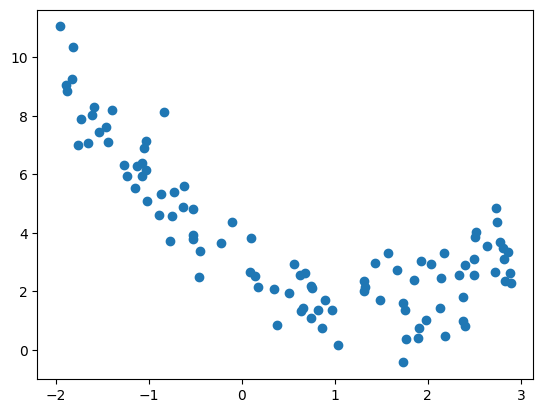

In [20]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

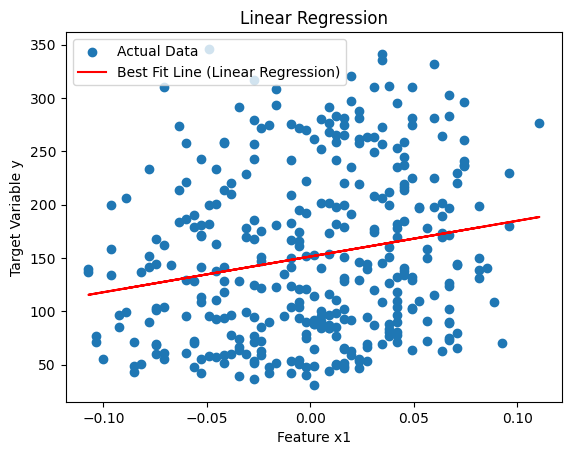

In [21]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train[:, 0].reshape(-1, 1), y_train)

# Calculate predictions using the linear regression model
y_pred_linear = linear_reg_model.predict(X_train[:, 0].reshape(-1, 1))

# Plot the scatter plot of actual data
plt.scatter(X_train[:, 0], y_train, label='Actual Data')

# Plot the best fit line (linear regression)
plt.plot(X_train[:, 0], y_pred_linear, color='red', label='Best Fit Line (Linear Regression)')

plt.xlabel('Feature x1')
plt.ylabel('Target Variable y')
plt.title('Linear Regression')
plt.legend()
plt.show()



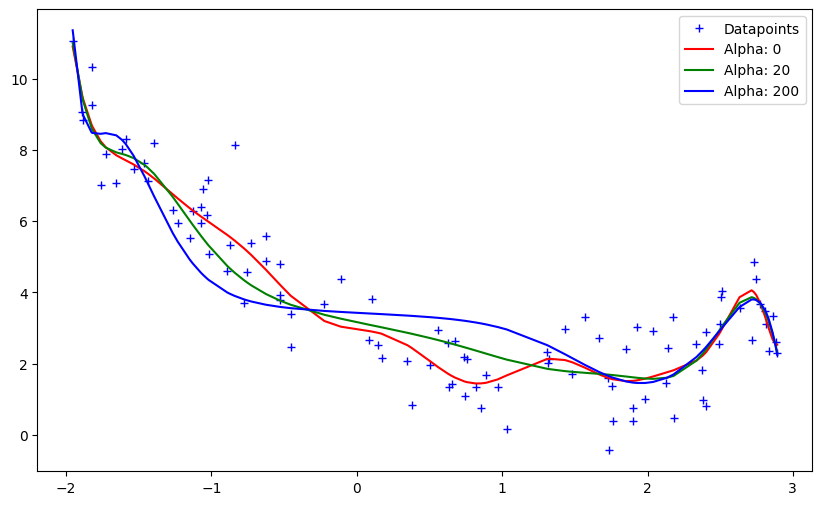

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()


In [52]:
import warnings
from scipy.linalg import LinAlgWarning

# Suppress LinAlgWarning
warnings.filterwarnings("ignore", category=LinAlgWarning)


This code defines a function get_best_fit_line that finds the best-fitting polynomial regression line using ridge regression.

The function get_best_fit_line takes three parameters: x1, x2, and alphas.

It initializes best_alpha and best_mse to None and infinity, respectively. best_alpha will store the alpha value that results in the lowest mean squared error (best_mse), and best_preds will store the predictions corresponding to the best alpha.

The function iterates over each alpha value in the alphas array.
Model Training: For each alpha, it creates a ridge regression model using Pipeline from scikit-learn.

polynomial feature expansion using PolynomialFeatures with a degree of 16, and ridge regression using Ridge with the current alpha.

It fits the model on x1 and x2 data and makes predictions on x1. Then, it calculates the mean squared error (mse) between the predictions and the actual x2 values.

If the calculated mse is lower than the current best_mse, it updates best_mse, best_alpha, and best_preds with the current values.
Finally, it returns the best alpha and the corresponding predictions.
After calling the function with appropriate data (x1, x2, and alphas), it prints the best alpha and plots the original datapoints (x1 vs. x2) along with the best-fitting line obtained using the best alpha value.

Best Alpha: 1


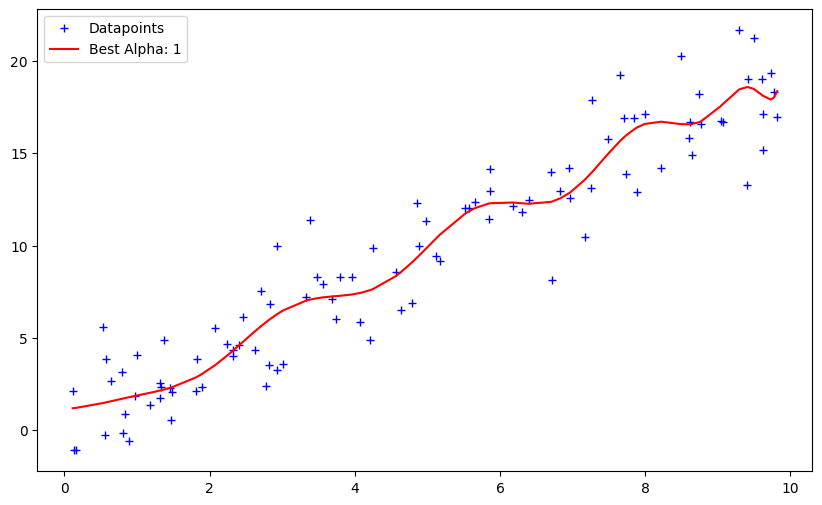

In [53]:
def get_best_fit_line(x1, x2, alphas):
    best_alpha = None
    best_mse = float('inf')  # Initialize with a large value
    best_preds = None
    
    for alpha in alphas:
        model = Pipeline([
            ('poly_feats', PolynomialFeatures(degree=16)),
            ('ridge', Ridge(alpha=alpha))
        ])
        model.fit(x1, x2)
        y_pred = model.predict(x1)
        mse = ((y_pred - x2) ** 2).mean()  # Calculate mean squared error
        
        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
            best_preds = y_pred
            
    return best_alpha, best_preds
alphas = np.arange(0, 21, 1) 
best_alpha, best_preds = get_best_fit_line(x1, x2, alphas)
print("Best Alpha:", best_alpha)
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')
plt.plot(sorted(x1[:, 0]), best_preds[np.argsort(x1[:, 0])], 'r', label='Best Alpha: {}'.format(best_alpha))
plt.legend()
plt.show()